<a href="https://colab.research.google.com/github/siyil/My-code/blob/master/Auth_failed_Pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
#from scipy.interpolate import spline
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols, quantreg
from ds_tools import db
from ds_tools import df_to_snowflake
import datetime as dt
from statsmodels.distributions.empirical_distribution import ECDF
from patsy import dmatrices

In [0]:

getauthfailed = '''
select t.id, t.user_id, t.created_at, b.geohash, r.name, t.status, u.created_at as user_created_at, t.bike_id, t.error, h.status_logs,
timediff(second, t.created_at::timestamp, substring(h.status_logs, charindex(':status: failed', h.status_logs) -34, 19)::timestamp) as first_failed, CAST((length(h.status_logs) - length(replace(h.status_logs, ':status: failed', '')))/15 AS int) as failed_counts
        from public.trips t
        join (select id, datestring, geohash from stg.bikes_daily) b on t.bike_id = b.id and dateadd('hour',-7, b.datestring::timestamp)::date = t.created_at::date
        join (select distinct region_id, geohash from public.geohashes) as g
        on g.geohash = b.geohash
        JOIN public.regions as r
        ON r.id = g.region_id
        join public.users u on t.user_id = u.id
        join public.trip_histories h on h.trip_id = t.id
where r.name <> 'Berlin' and t.status = 'reservation_expired' and t.error = 'auth_failed'
'''

samples = db.query_snowflake(getauthfailed, warehouse = 'COMPUTE_WH')


Text(0.5, 1.0, 'distribution of time difference in seconds, reserved and first failed')

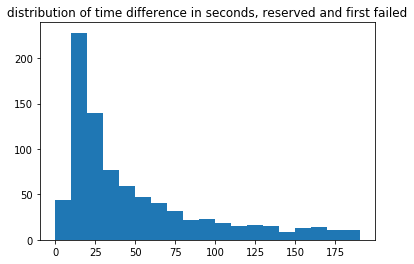

In [13]:
plt.hist(samples['first_failed'], bins = range(0,200,10))
plt.title('distribution of time difference in seconds, reserved and first failed')

Text(0.5, 1.0, 'distribution of failed counts')

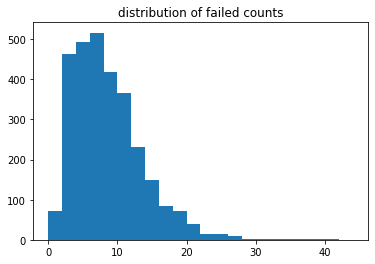

In [10]:
plt.hist(samples['failed_counts'], bins = range(0,46,2))
plt.title('distribution of failed counts')